# Imports and Setup

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

import getdist
from getdist import plots, loadMCSamples

from plot_style import style_dict
from theory_models import (
    add_concave_convex_divide, add_concave_convex_labels,
    add_polynomial_potentials, add_efold_shading, add_alpha_unity_model_markers,
    add_polynomial_alpha_attractor
)
from legend_utils import (
    create_dummy_plot_elements_for_legend, add_model_handlers_to_legend,
    add_monomial_legend_entry, add_alpha_attractor_legend_entry
)

# Load in Data, Create Forecast

In [2]:
chain_files = {
    "SPA_BK": "chains/SPA_BK/CLASS",
    "SPA_BK_DESI": "chains/SPA_BK_DESI/CLASS",
}

chains = {}
bf_dicts = {}
for key, value in chain_files.items():
    chains[key] = loadMCSamples(value, settings={"ignore_rows": 0.0})# Burn-in has already been removed
    bf_dicts[key] = chains[key].getParamBestFitDict()

In [3]:
# Create forecast chains preserving r-ns correlation from real data
cov = chains["SPA_BK"].cov(["r", "n_s"])
corr = cov / np.sqrt(np.outer(np.diag(cov), np.diag(cov)))
cov_scaled = np.diag([1e-3, 2e-3]) @ corr @ np.diag([1e-3, 2e-3])

mrg = chains["SPA_BK"].getMargeStats()
chains["FC"] = getdist.gaussian_mixtures.GaussianND([3e-3, mrg.parWithName("n_s").mean],
                                                    cov_scaled,
                                                    names=["r", "n_s"])

mrg_desi = chains["SPA_BK_DESI"].getMargeStats()
chains["FC_DESI"] = getdist.gaussian_mixtures.GaussianND([3e-3, mrg_desi.parWithName("n_s").mean],
                                                         cov_scaled,
                                                         names=["r", "n_s"])

# Simple, Clean Plot

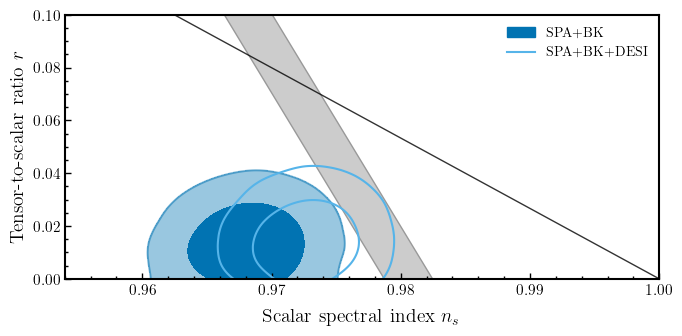

In [4]:
plt.close()

g = plots.get_single_plotter(width_inch=2.0*3.464, ratio=0.5)
g.settings.legend_frame = False
ax = plt.gca()

# Data constraints
all_dat = ["SPA_BK", "SPA_BK_DESI"]
g.plot_2d([chains[dat] for dat in all_dat],
          ["n_s", "r"],
          colors=[style_dict[dat]["colour"] for dat in all_dat],
          ls=[style_dict[dat]["ls"] for dat in all_dat],
          lws=[style_dict[dat]["lw"] for dat in all_dat],
          filled=[style_dict[dat]["filled"] for dat in all_dat])

# Add theory elements (publication N* range: 47-57)
add_efold_shading(ax, N_range=(47, 57), ns_range=(0.96, 1.0))
add_concave_convex_divide(ax, ns_range=(0.96, 1.0))

# Legend
g.add_legend(["SPA+BK", "SPA+BK+DESI"], fontsize=10)

# Axis setup
ax.set_ylim((0, 0.1))
ax.set_xlim((0.954, 1.0))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel("Tensor-to-scalar ratio $r$")
ax.set_xlabel("Scalar spectral index $n_s$")

plt.tight_layout()
plt.show()

# Paper Plots

## Data Plot

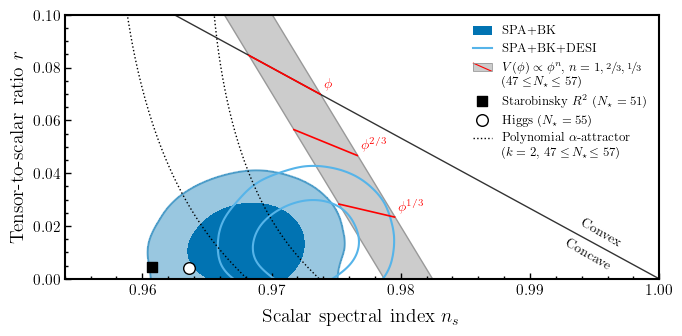

In [5]:
# Cell: Data Plot (Paper version)
plt.close()

g = plots.get_single_plotter(width_inch=2.0*3.464, ratio=0.5)
ax = plt.gca()

# Data constraints
all_dat = ["SPA_BK", "SPA_BK_DESI"]
g.plot_2d([chains[dat] for dat in all_dat],
          ["n_s", "r"],
          colors=[style_dict[dat]["colour"] for dat in all_dat],
          ls=[style_dict[dat]["ls"] for dat in all_dat],
          lws=[style_dict[dat]["lw"] for dat in all_dat],
          filled=[style_dict[dat]["filled"] for dat in all_dat])

# Build legend manually
legend_handles, legend_labels, handler_map = create_dummy_plot_elements_for_legend(all_dat, True)

# Theory elements
add_concave_convex_divide(ax, ns_range=(0.9, 1.1))

# Polynomial potentials (N* = 47-57 for publication)
add_polynomial_potentials(ax, p_values=[1/3, 2/3, 1], N_range=(47, 57),
                          label_offsets={"1/3": [0.00025, 0.0025],
                                        "2/3": [0.00025, 0.0025],
                                        "": [0.00025, 0.0025]})

# E-fold shading
add_efold_shading(ax, N_range=(47, 57), ns_range=(0.96, 1.0))

# Add monomial legend entry with custom handler
add_monomial_legend_entry(legend_handles, legend_labels, handler_map, 
                          N_range=(47, 57), yoffset=5.25)

# Model markers (single N* values for publication)
model_handles, model_labels = add_alpha_unity_model_markers(
    ax, models=["Starobinsky $R^2$", "Higgs"], return_handles=True)
legend_handles.extend(model_handles)
legend_labels.extend(model_labels)

# Polynomial alpha-attractor lines
add_polynomial_alpha_attractor(ax, N_star=[47, 57], k=2, ls=":")
add_alpha_attractor_legend_entry(legend_handles, legend_labels, handler_map,
                                  N_star=[47, 57], k=2, yoffset=5.25)

# Concave/Convex labels
add_concave_convex_labels(ax)

# Legend
add_model_handlers_to_legend(ax, handles=legend_handles, labels=legend_labels,
                             handler_map=handler_map, loc="upper right", 
                             ncol=1, fontsize=9, handlelength=1.5)

# Axis setup
ax.set_ylim((0, 0.1))
ax.set_xlim((0.954, 1.0))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel("Tensor-to-scalar ratio $r$")
ax.set_xlabel("Scalar spectral index $n_s$")

plt.tight_layout()
# plt.savefig("r_ns_data.pdf", bbox_inches='tight', dpi=400)
plt.show()


## Forecast Plot

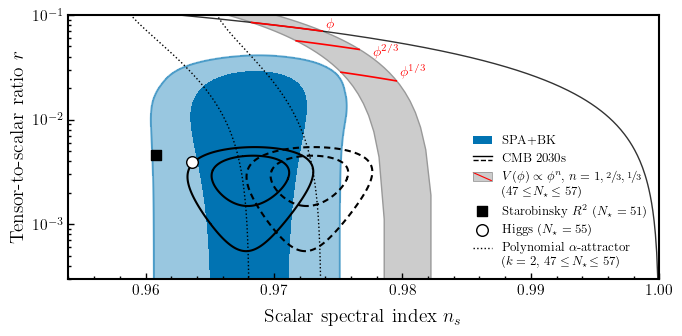

In [6]:
# Cell: Forecast Plot
plt.close()

g = plots.get_single_plotter(width_inch=2.0*3.464, ratio=0.5)
ax = plt.gca()

# Data constraints
all_dat = ["SPA_BK", "FC", "FC_DESI"]
g.plot_2d([chains[dat] for dat in all_dat],
          ["n_s", "r"],
          colors=[style_dict[dat]["colour"] for dat in all_dat],
          ls=[style_dict[dat]["ls"] for dat in all_dat],
          lws=[style_dict[dat]["lw"] for dat in all_dat],
          filled=[style_dict[dat]["filled"] for dat in all_dat])

# Build legend manually (includes two-line handler for forecasts)
legend_handles, legend_labels, handler_map = create_dummy_plot_elements_for_legend(all_dat, True)

# Theory elements (optimized for log scale)
add_concave_convex_divide(ax, ns_range=(0.9, 1.1))

# Polynomial potentials with label offsets optimized for log scale
phi_text_placement = {"1/3": [0.00025, 0.0025],
                      "2/3": [4*0.00025, -2.5*0.0025],
                      "": [0.00025, 2*0.0025]}
add_polynomial_potentials(ax, p_values=[1/3, 2/3, 1], N_range=(47, 57),
                          label_offsets=phi_text_placement)

# E-fold shading
add_efold_shading(ax, N_range=(47, 57), ns_range=(0.96, 1.0))

# Add monomial legend entry
add_monomial_legend_entry(legend_handles, legend_labels, handler_map,
                          N_range=(47, 57), yoffset=5.25)

# Model markers
model_handles, model_labels = add_alpha_unity_model_markers(
    ax, models=["Starobinsky $R^2$", "Higgs"], return_handles=True)
legend_handles.extend(model_handles)
legend_labels.extend(model_labels)

# Polynomial alpha-attractor lines (use log-optimized data)
add_polynomial_alpha_attractor(ax, N_star=[47, 57], k=2)
add_alpha_attractor_legend_entry(legend_handles, legend_labels, handler_map,
                                  N_star=[47, 57], k=2, yoffset=5.25)

# Legend
add_model_handlers_to_legend(ax, handles=legend_handles, labels=legend_labels,
                             handler_map=handler_map, loc="lower right",
                             ncol=1, fontsize=9, handlelength=1.5)

# Axis setup (log scale)
ax.set_ylim((3e-4, 1e-1))
ax.set_xlim((0.954, 1.0))
ax.set_yscale("log")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel("Tensor-to-scalar ratio $r$")
ax.set_xlabel("Scalar spectral index $n_s$")

plt.tight_layout()
# plt.savefig("r_ns_forecast.pdf", bbox_inches='tight', dpi=400)
plt.show()